** Import Libraries**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


**Mount the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change the working directory**

In [3]:
os.chdir("/content/drive/My Drive/Colab Notebooks/Mini Project/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Mini Project'

**Load and Display Image**

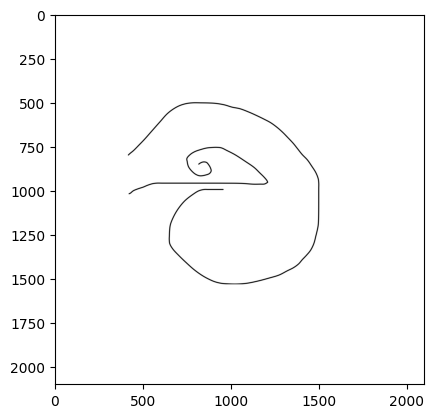

In [4]:
#Specify the path to the image and load the image using load_img from Keras
img = image.load_img("Train Data/Cha/1.jpg")

#Display the image using matplotlib
plt.imshow(img)

In [5]:
# Read the image using OpenCV (cv2) and retrieve its shape
cv2.imread("Train Data/Cha/1.jpg").shape

(2100, 2100, 3)

In [6]:
# Create an ImageDataGenerator for training data with pixel value rescaling
train = ImageDataGenerator(rescale = 1/255)
# Create an ImageDataGenerator for validation data with pixel value rescaling
validation = ImageDataGenerator(rescale = 1/255)

**CREATE TRAINING AND VALIDATION DATASETS USING ImageDataGenerator**

In [8]:
# Create a training dataset generator using the training ImageDataGenerator
train_dataset = train.flow_from_directory('Train Data/',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 80 images belonging to 2 classes.


In [9]:
# Retrieve the mapping of class names to their indices in the training dataset
train_dataset.class_indices

{'Cha': 0, 'Na': 1}

In [10]:
# Retrieve the array of class indices for each sample in the training dataset
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Specifing the Convolution Neural Network Architecture**

In [12]:
# Create a Sequential model
# Convolutional layer with 16 filters, each of size (3, 3), and ReLU activation
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   # MaxPooling layer with pool size (2, 2)
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 32 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Convolutional layer with 64 filters, each of size (3, 3), and ReLU activation
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   # Flatten layer to convert 3D feature maps to 1D feature vectors
                                    tf.keras.layers.Flatten(),
                                   # Dense (fully connected) layer with 512 units and ReLU activation
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                   # Output layer with 1 unit and sigmoid activation for binary classification
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                    ])


# Compile the model with binary crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

**Train The Model**

In [14]:
# Train the model using the training dataset and validate on the validation dataset
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
5/5 [==============================] - 10s 1s/step - loss: 2.0928 - accuracy: 0.4000
Epoch 2/30
5/5 [==============================] - 5s 838ms/step - loss: 0.7498 - accuracy: 0.4000
Epoch 3/30
5/5 [==============================] - 5s 967ms/step - loss: 0.5488 - accuracy: 0.8667
Epoch 4/30
5/5 [==============================] - 5s 939ms/step - loss: 0.6952 - accuracy: 0.8000
Epoch 5/30
5/5 [==============================] - 4s 636ms/step - loss: 0.3007 - accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 3s 477ms/step - loss: 0.0798 - accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 4s 657ms/step - loss: 1.3116 - accuracy: 0.5333
Epoch 8/30
5/5 [==============================] - 5s 902ms/step - loss: 0.5290 - accuracy: 0.8000
Epoch 9/30
5/5 [==============================] - 4s 638ms/step - loss: 0.2216 - accuracy: 0.8667
Epoch 10/30
5/5 [==============================] - 3s 634ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 11/30
5/5 [====

**TESTING SAMPLE DATA**

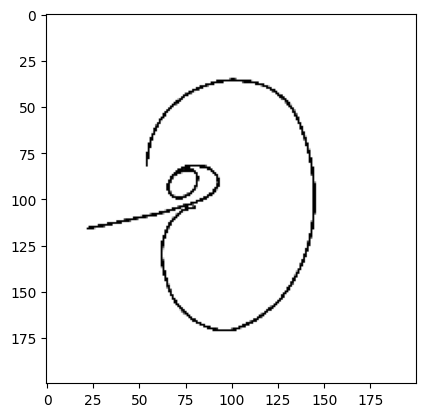

1/1 [==============================] - 0s 138ms/step
This is Letter 'Cha' in Sinhala


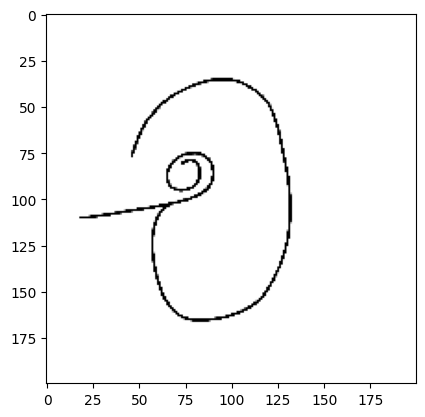

1/1 [==============================] - 0s 42ms/step
This is Letter 'Cha' in Sinhala


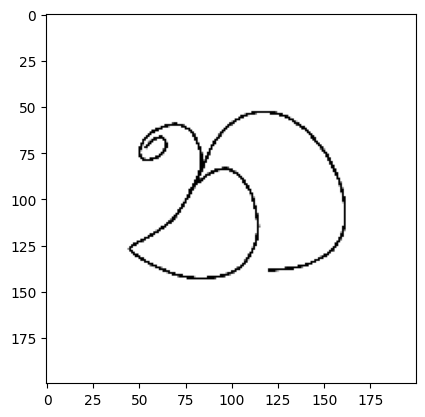

1/1 [==============================] - 0s 40ms/step
This is Letter 'Na' in Sinhala


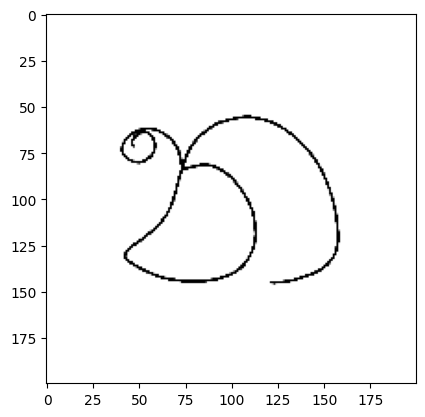

1/1 [==============================] - 0s 40ms/step
This is Letter 'Na' in Sinhala


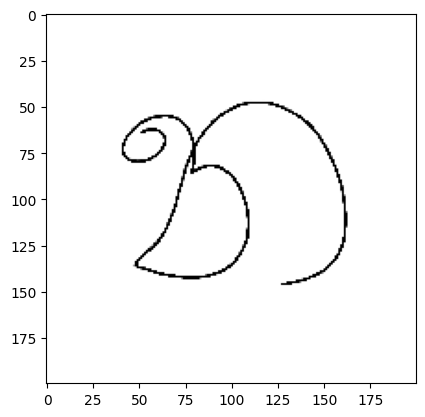

1/1 [==============================] - 0s 52ms/step
This is Letter 'Na' in Sinhala


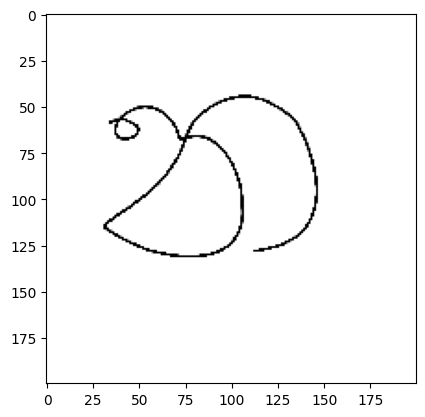

1/1 [==============================] - 0s 61ms/step
This is Letter 'Na' in Sinhala


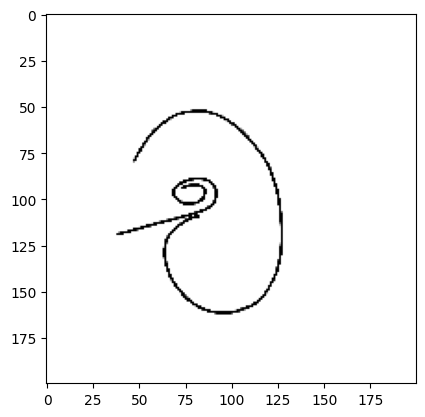

1/1 [==============================] - 0s 62ms/step
This is Letter 'Cha' in Sinhala


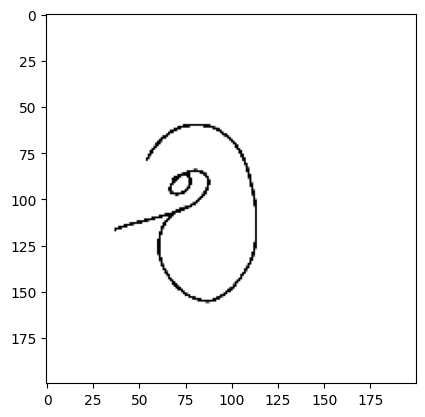

1/1 [==============================] - 0s 62ms/step
This is Letter 'Cha' in Sinhala


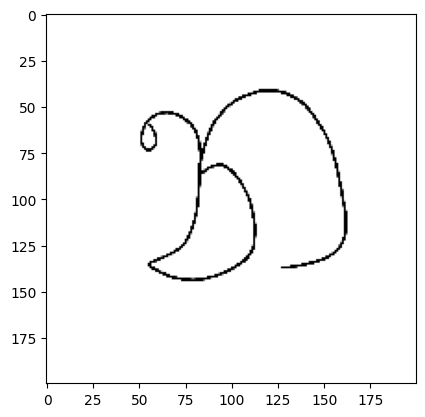

1/1 [==============================] - 0s 40ms/step
This is Letter 'Na' in Sinhala


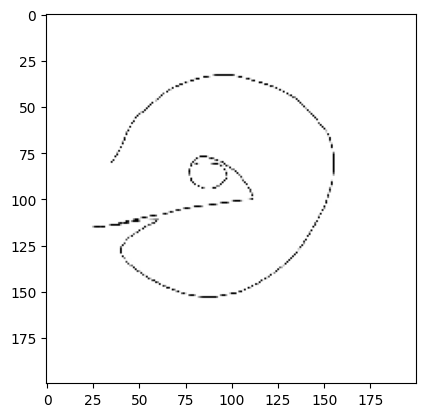

1/1 [==============================] - 0s 34ms/step
This is Letter 'Cha' in Sinhala


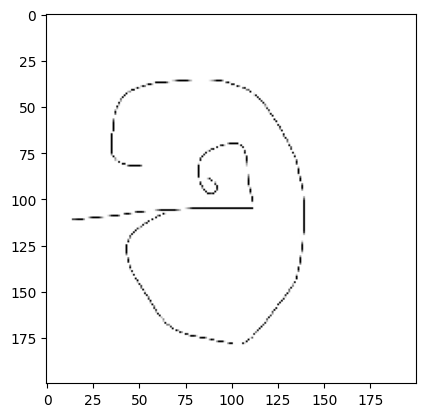

1/1 [==============================] - 0s 42ms/step
This is Letter 'Cha' in Sinhala


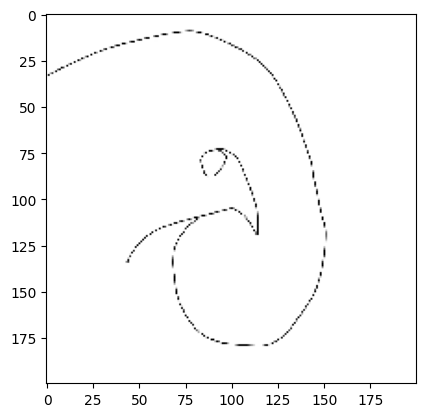

1/1 [==============================] - 0s 41ms/step
This is Letter 'Cha' in Sinhala


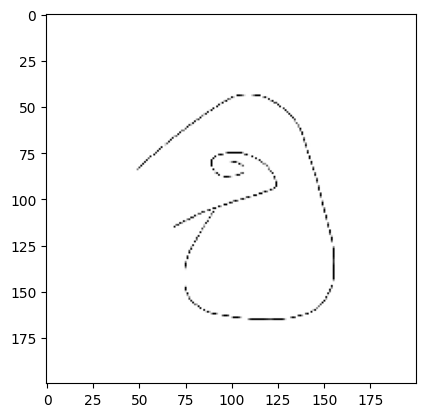

1/1 [==============================] - 0s 36ms/step
This is Letter 'Cha' in Sinhala


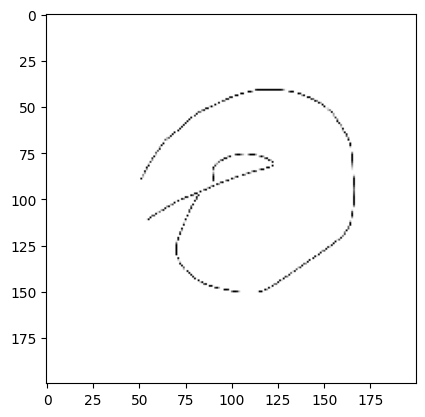

1/1 [==============================] - 0s 43ms/step
This is Letter 'Cha' in Sinhala


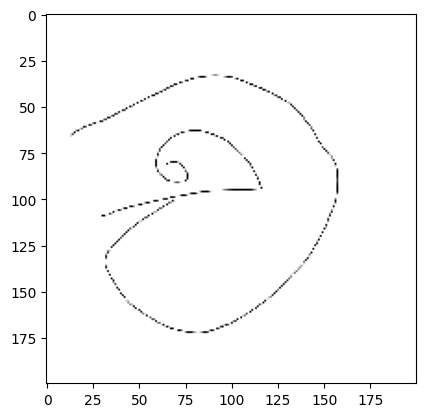

1/1 [==============================] - 0s 51ms/step
This is Letter 'Cha' in Sinhala


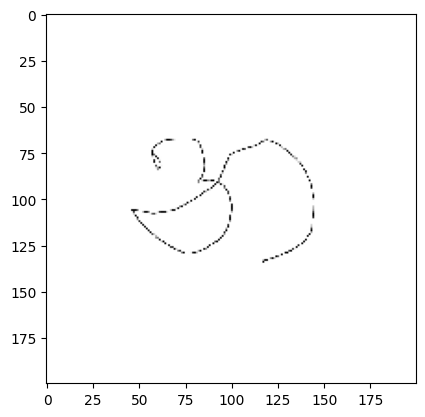

1/1 [==============================] - 0s 35ms/step
This is Letter 'Na' in Sinhala


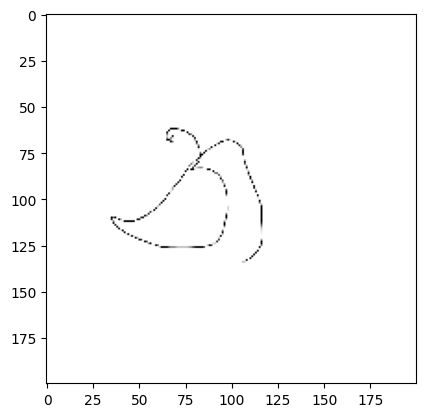

1/1 [==============================] - 0s 43ms/step
This is Letter 'Na' in Sinhala


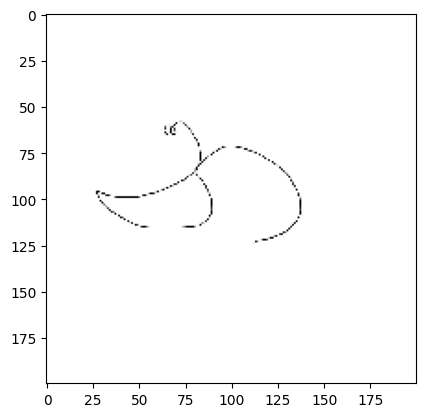

1/1 [==============================] - 0s 40ms/step
This is Letter 'Na' in Sinhala


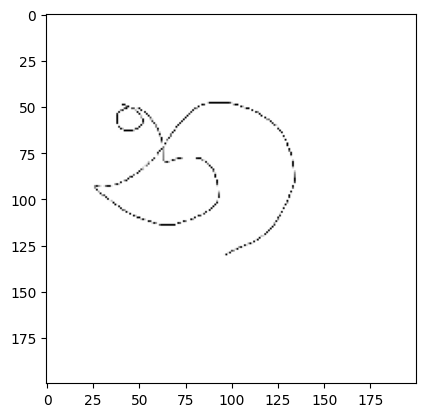

1/1 [==============================] - 0s 82ms/step
This is Letter 'Na' in Sinhala


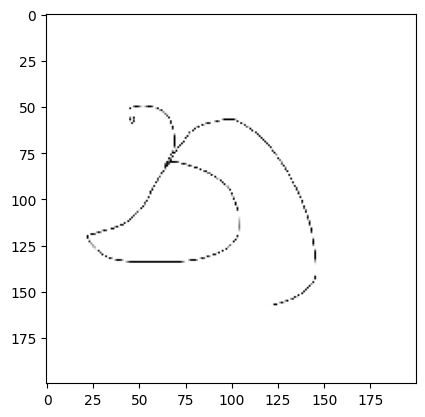

1/1 [==============================] - 0s 74ms/step
This is Letter 'Na' in Sinhala


In [15]:
# path containing the testing images
dir_path = 'Testing Data/'

# Loop over each file in the directory
for i in os.listdir(dir_path):
  # Load the image and resize it to the target size
  img = image.load_img(dir_path+ i,target_size=(200,200))
  # Display the image using matplotlib
  plt.imshow(img)
  plt.show()

# Convert the image to a NumPy array and add an extra dimension
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
# Stack the array vertically to create a batch of images
  images = np.vstack([X])
# Make a prediction using the trained model
  val = model.predict(images)
# Check the predicted value and print the corresponding class label
  if val == 0:
    print("This is Letter 'Cha' in Sinhala")
  else:
    print("This is Letter 'Na' in Sinhala")